# 吴恩达机器学习习题二：逻辑回归（线性可分）<br>
- 假设你是大学校长，根据以前的录取成绩来预测两个学生的录取概率


## 流程图及相关函数公式<br><br>
![](./IMG_3293.JPG)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

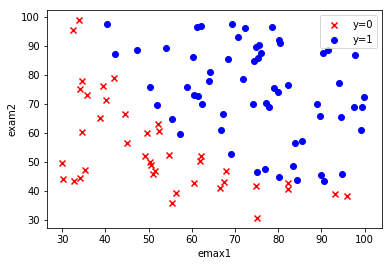

In [2]:
#数据可视化
data = pd.read_csv('ex2data1.txt',names=['Exam 1','Exam 2','Accepted'])
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='red',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='blue',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='emax1',ylabel='exam2')
plt.show()

In [3]:
#构造数据集（变成矩阵）
def get_Xy(data):
    data.insert(0,'ones',1)  
    X = data.iloc[:,0:-1]
    y = data.iloc[:,-1]
    X = np.array(X)
    y = np.array(y)
    y = y.reshape((len(y),1))
    return X,y

In [4]:
#g(x)函数
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

In [5]:
#代价函数
def cost_function(X,y,theta):
    y1 = sigmoid_function(X@theta)
    first = y*np.log(y1)
    second = (1-y)*np.log(1-y1)
    return -np.sum(first+second)/len(X)

In [6]:
#梯度下降函数
def gradient_descent_function(X,y,theta,alpha,times):
    costs = []
    for i in range(times):
        y1 = sigmoid_function(X@theta)
        theta = theta - (alpha*(X.T@(y1-y)))/len(X)
        cost = cost_function(X,y,theta)
        costs.append(cost)
    return theta,costs

In [7]:
#画图
def draw(x1,x2):
    fig,ax = plt.subplots()
    ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='red',marker='x',label='y=0')
    ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='blue',marker='o',label='y=1')
    ax.plot(x1,x2,c='red',label='predict')
    ax.legend()
    ax.set(xlabel='emax1',ylabel='exam2')
    plt.show()

In [8]:
#计算准确率
def predict(X,theta):
    results = sigmoid_function(X@theta)  #返回一个矩阵
    ones=[]
    for result in results:
        if result > 0.5:
            i = 1
        else:
            i = 0
        ones.append(i)
    return ones

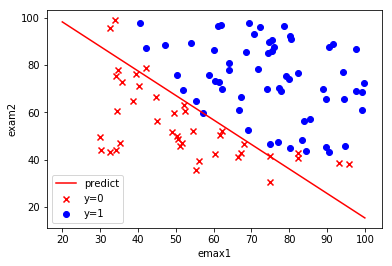

0.91


In [9]:
X,y = get_Xy(data)
theta = np.zeros((3,1))
times = 200000
alpha = 0.004
theta1,costs1 = gradient_descent_function(X,y,theta,alpha,times)
#决策边界函数表达式
x1 = np.linspace(20,100,100)  #np.linspace(开始值，结束值，步长)返回一个等差数列
l1 = -theta1[0,0]/theta1[2,0]
l2 = -theta1[1,0]/theta1[2,0]
x2 = l1+l2*x1
draw(x1,x2)
y_ = np.array(predict(X,theta1))
y_ = y_.reshape(len(y),1)
acc = np.mean(y_==y)
print(acc)